# Problem:

#### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Data set for the Problem: Rose.csv

#### Please do perform the following questions on this set.


1.Read the data as an appropriate Time Series data and plot the data.


2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


3.Split the data into training and test. The test data should start in 1991.


4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.


5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [1]:
#Basic Packages
import pandas as pd
import numpy as np
from pandas import datetime
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#Visualization Package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Acer\AppData\Local\Temp/ipykernel_13260/2403509493.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Q.1 Read the data as an appropriate Time Series data and plot the data.

In [2]:
df = pd.read_csv("downloads/Rose.csv")
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [4]:
df.shape

(187, 2)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [7]:
df.interpolate(inplace=True)
df[df['Rose'].isna()]

,YearMonth,Rose


In [8]:
df['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')
df.head()

,YearMonth,Rose,Date
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [9]:
df.drop(['YearMonth'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Rose    187 non-null    float64       
 1   Date    187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [11]:
df.set_index('Date',inplace=True)
df.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


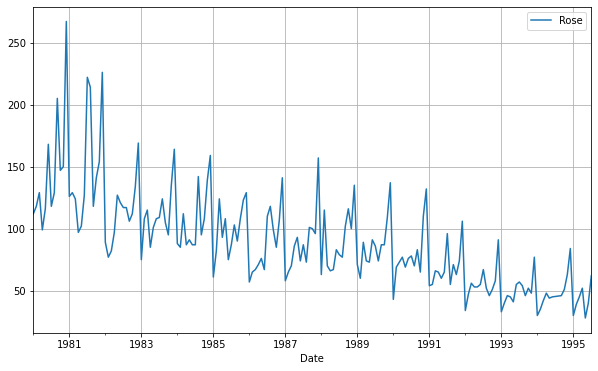

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
df.plot(grid=True);

# Q.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

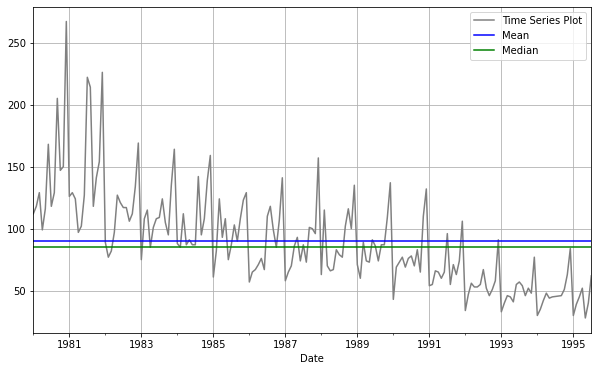

In [13]:
df.plot(color='Grey')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

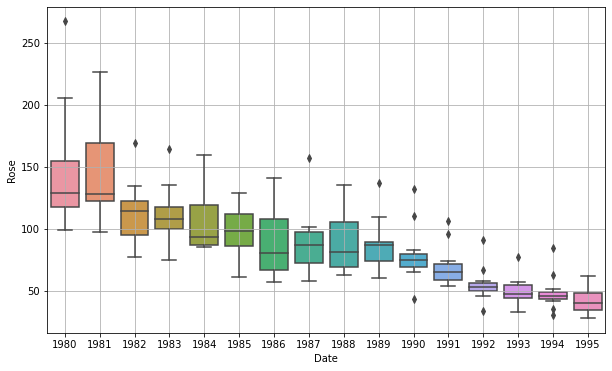

In [14]:
sns.boxplot(x=df.index.year,y=df['Rose'])
plt.grid();

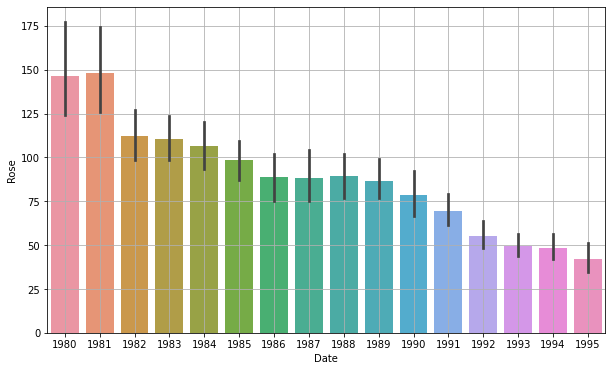

In [15]:
sns.barplot(x = df.index.year, y = df.Rose,data=df)
plt.grid();

Here, we can see the year of 1981 is recording the highest sale in the year and after that we can see that the sales kept on decreasing the year of 1986, 1987 & 1988 also did pretty decently in terms of sales but if we see the overall trend of the sales of wine its not good as it kept on decreasing with passing time and need some measures i order to keep up in the market. 

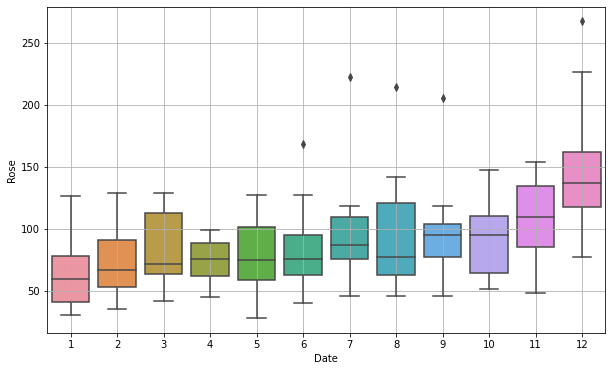

In [16]:
sns.boxplot(x=df.index.month,y=df['Rose'])
plt.grid();

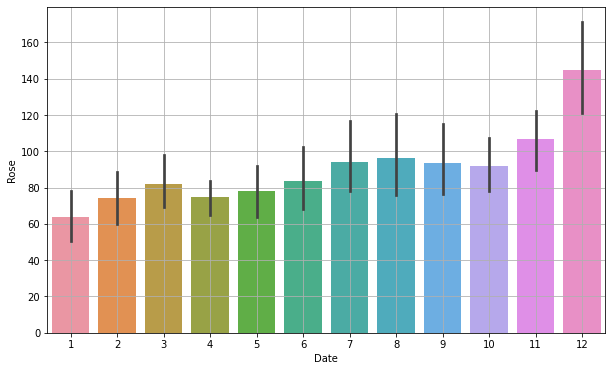

In [17]:
sns.barplot(x = df.index.month, y = df.Rose,data=df)
plt.grid();

Here, we can see monthly sales from this graph we can make out that the month of december is recording the highest sales followed by November and the month of july, august, september is doing pretty decent in terms of sale. the month january is recorded as the month with the lowest of the sale for this we have to do some reaserch as to why the first 5 months are recording very low selling of wine.

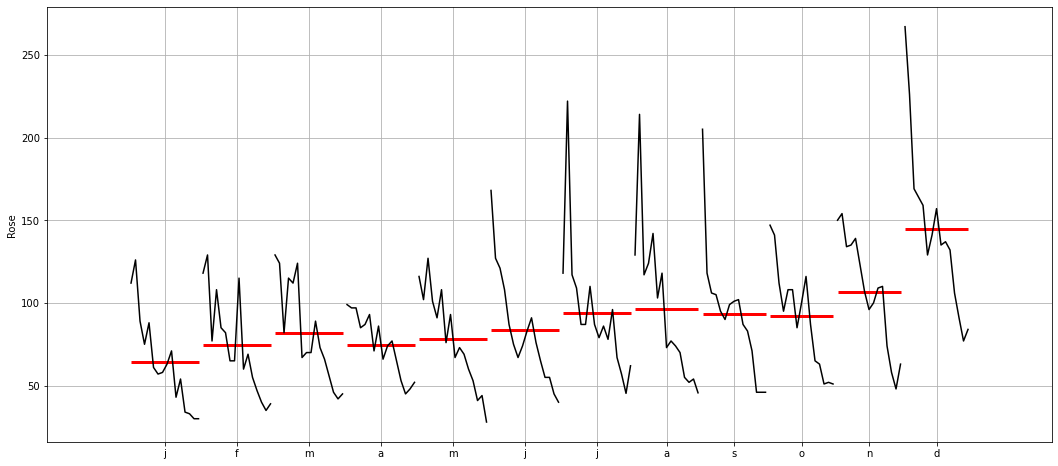

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(18,8))

month_plot(df,ylabel='Rose',ax=ax)
plt.grid();

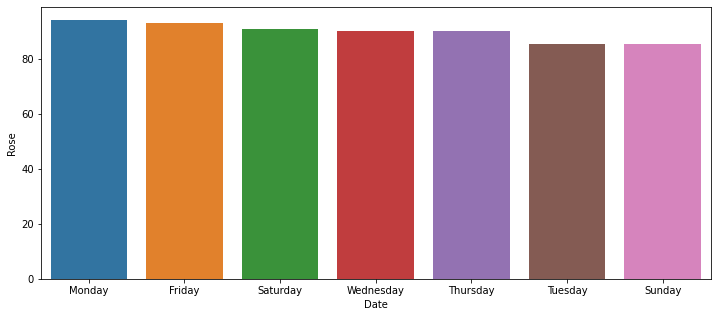

In [19]:
#Saturday registers highest average sales of beer throughout the whole week.
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Rose']);

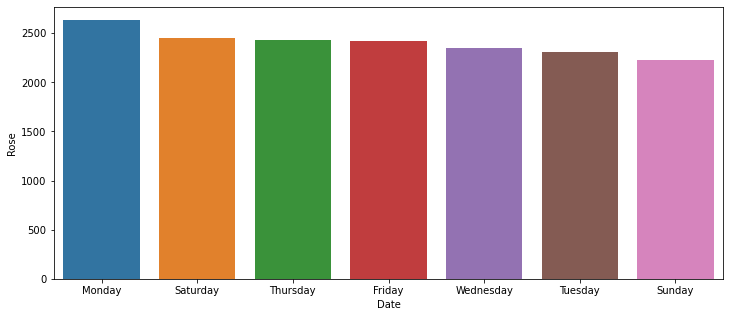

In [20]:
#Monday has the highest sales overall
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Rose']);

In [21]:
#Creating PIVOT table.
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


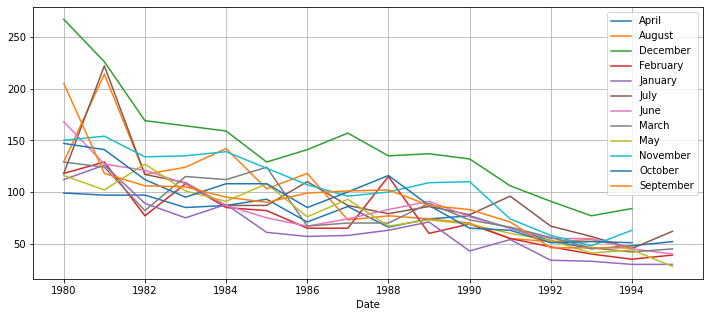

In [22]:
#Dec registers the highest amount of sales
monthly_sales_across_years.plot(figsize=(12,5))
plt.grid()
plt.legend(loc='best');

# Decompostion

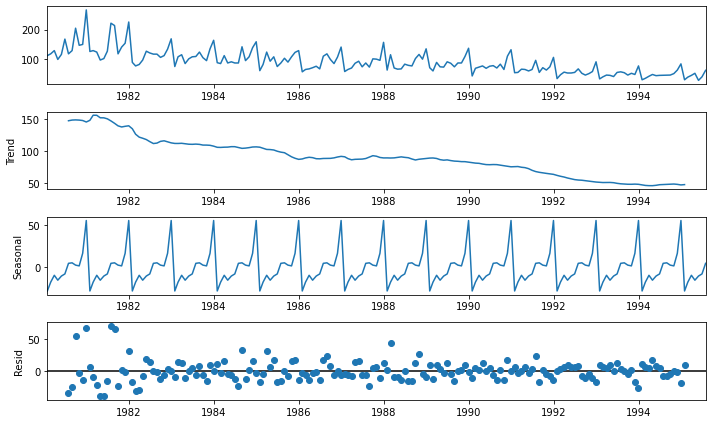

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
#As the seasonal variation is more or less constant hence we will going to choose additive model.
decompose_addition = seasonal_decompose(df,model='additive')
decompose_addition.plot();

In [24]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(12),'\n')
print('Seasonality','\n',seasonality_add.head(12),'\n')
print('Residual','\n',residual_add.head(12),'\n')

Trend 
 Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.161425
Name: resid, 

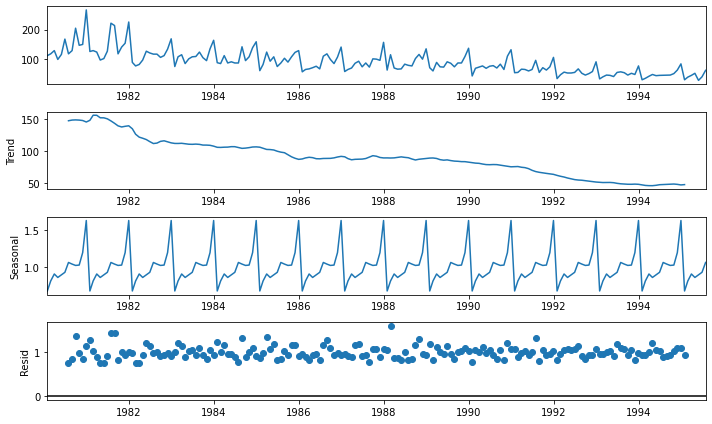

In [25]:
decompose_multi=seasonal_decompose(df,model='multiplicative')
decompose_multi.plot();

In [26]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(12),'\n')
print('Seasonality','\n',seasonality_mul.head(12),'\n')
print('Residual','\n',residual_mul.head(12),'\n')

Trend 
 Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype: float64 



# Q.3 Split the data into training and test. The test data should start in 1991.

In [27]:
train=df.loc['1980-01-31':'1990-12-31']
test=df.loc['1991-01-31':]

In [28]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [29]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Date,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Date,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


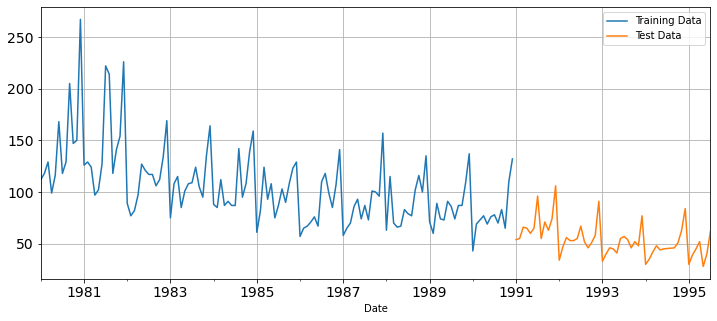

In [30]:
#Plotting Training - Testing Data
train['Rose'].plot(figsize=(12,5), fontsize=14)
test['Rose'].plot(figsize=(12,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Q.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [31]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [32]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Date,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
Date,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
Date,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data


,Rose,time
Date,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

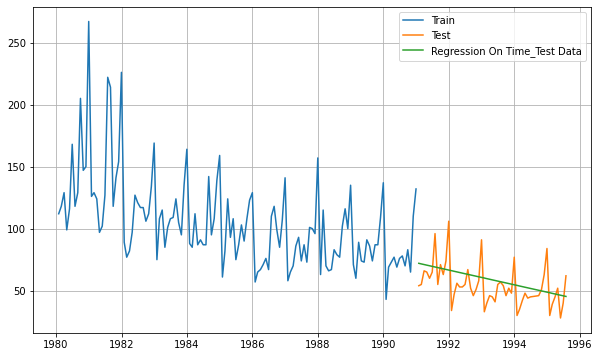

In [36]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [37]:
##### Defining the functions for calculating the accuracy metrics.
from sklearn import metrics

#### Model Evaluation

In [38]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


# Model 2: Naive Approach

In [40]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [41]:
train.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [42]:
test.head()

,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [43]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

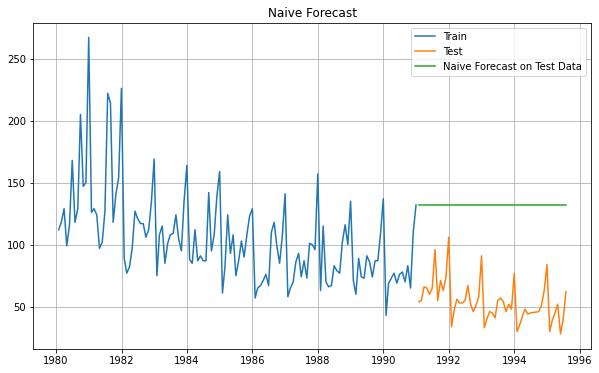

In [44]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

#### Model Evaluation

In [45]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [46]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


# Method 3: Simple Average

In [47]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [48]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Date,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


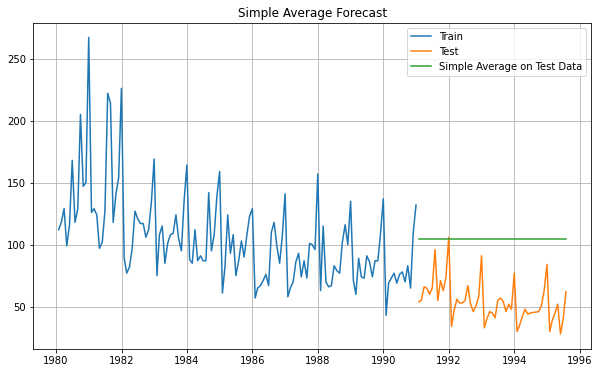

In [49]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [50]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [51]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


# Method 4: Moving Average(MA)

In [52]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [53]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


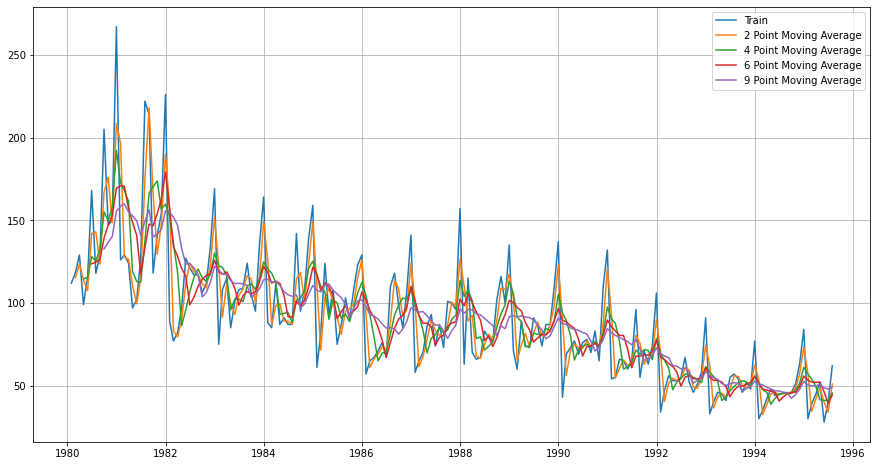

In [54]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [55]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

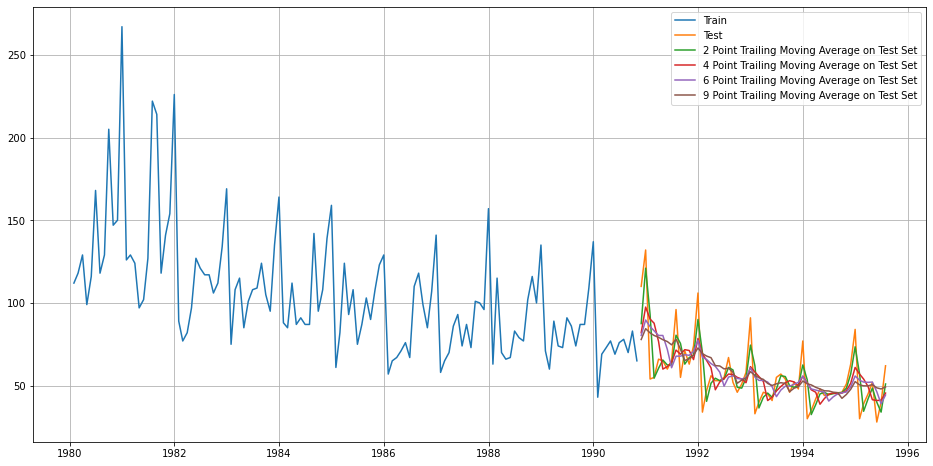

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [57]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444
1991-01-31,54.0,93.0,90.25,85.666667,81.888889
1991-02-28,55.0,54.5,87.75,83.166667,80.333333
1991-03-31,66.0,60.5,76.75,80.333333,79.222222


In [58]:
trailing_MovingAverage_test.shape

(57, 5)

In [59]:
test.head()

,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [60]:
test.shape

(55, 1)

### Model Evaluation
Done only on the test data.

In [61]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


In [63]:
import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

#### Exponential Smoothing methods
Exponential smoothing methods consist of flattening time series data.


Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.


Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
One or more parameters control how fast the weights decay.

These parameters have values between 0 and 1

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [66]:
model_SES_autofit = model_SES.fit(optimized=True)

In [67]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict.head()

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
Freq: M, dtype: float64

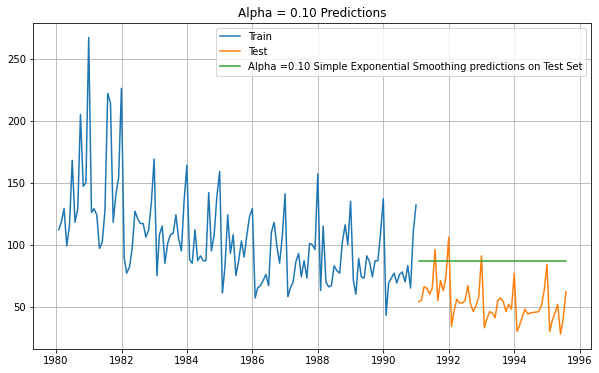

In [69]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.10 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.10 Predictions');

In [70]:
from   sklearn.metrics                 import  mean_squared_error
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.79624054770398
SES RMSE (calculated using statsmodels): 36.796240547703974


In [71]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]}, index =['Alpha=0.10,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.10,SimpleExponentialSmoothing",36.796241


The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

Ft+1=αYt+(1−α)Ft
Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.
SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

# Holt - ETS(A, A, N) - Holt's linear method with additive errors

# Double Exponential Smoothing

One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.

One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.
Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

Intercept or Level equation, Lt is given by: Lt=αYt+(1−α)Ft
Trend equation is given by Tt=β(Lt−Lt−1)+(1−β)Tt−1
Here, α and β are the smoothing constants for level and trend, respectively,

0 <α < 1 and 0 < β < 1.
The forecast at time t + 1 is given by

Ft+1=Lt+Tt
Ft+n=Lt+nTt

In [72]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [73]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.head()

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
Freq: M, dtype: float64

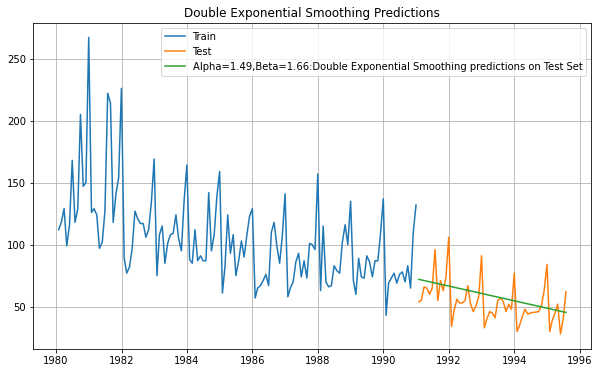

In [74]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Alpha=1.49,Beta=1.66:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [75]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.268943764436564


In [76]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.10,SimpleExponentialSmoothing",36.796241
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944


#### Inference
Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [77]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [78]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-01-31    42.684928
1991-02-28    54.564005
1991-03-31    61.995209
1991-04-30    50.852018
1991-05-31    59.034271
Freq: M, dtype: float64

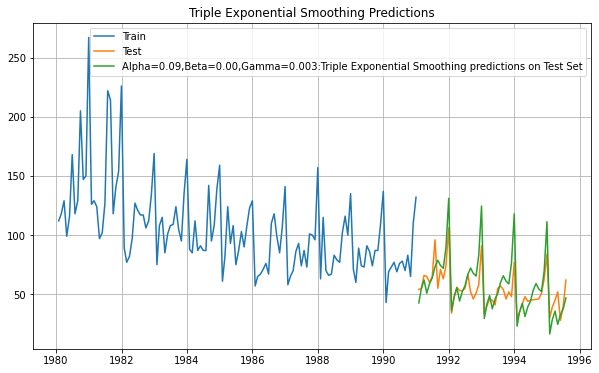

In [79]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [80]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.249660750768982


In [81]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.10,SimpleExponentialSmoothing",36.796241
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661


# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method


In [82]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [83]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am.head()

1991-01-31    56.321655
1991-02-28    63.664690
1991-03-31    69.374024
1991-04-30    60.435528
1991-05-31    67.758341
Freq: M, dtype: float64

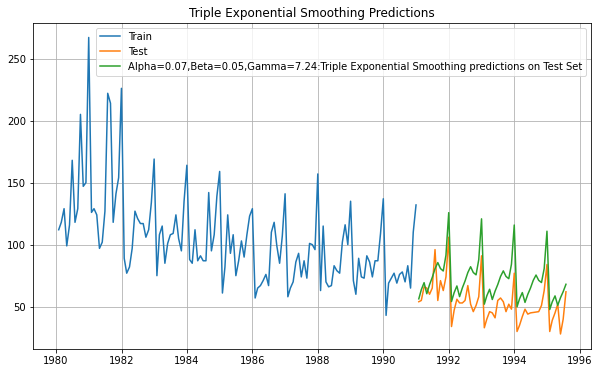

In [84]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_am, label='Alpha=0.07,Beta=0.05,Gamma=7.24:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

#### Report model accuracy

In [85]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.156762582665337


In [86]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.07,Beta=0.05,Gamma=7.24:Triple Exponential Smoothing 2'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
"Alpha=0.10,SimpleExponentialSmoothing",36.796241
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661


# Q.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

## Note: Stationarity should be checked at alpha = 0.05.

In [87]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

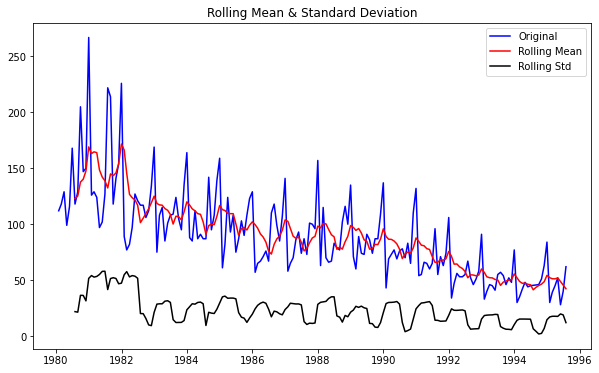

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [88]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

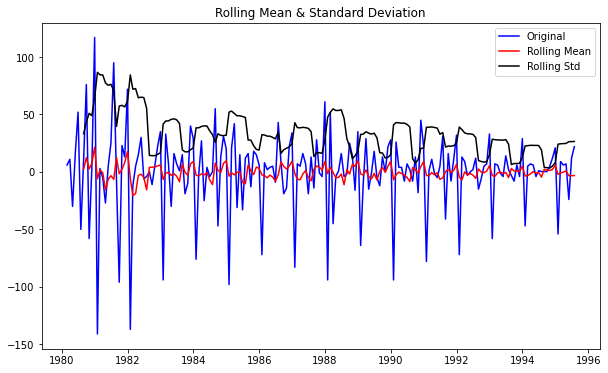

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [89]:
test_stationarity(df['Rose'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary.

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

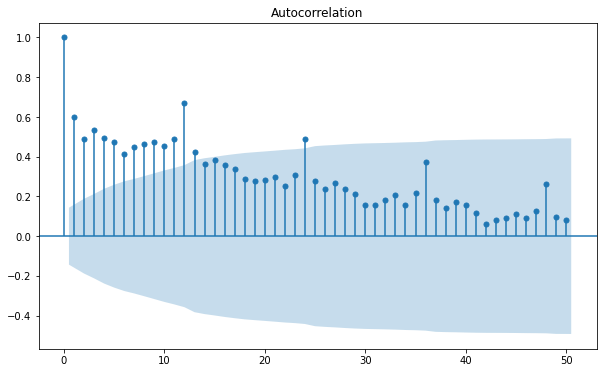

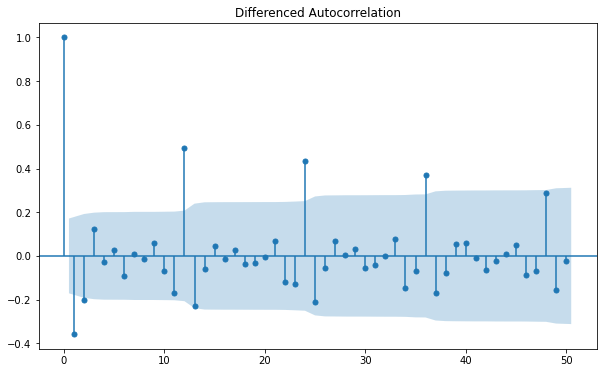

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Rose'],lags = 50)
plot_acf(train.diff().dropna(),lags = 50,title='Differenced Autocorrelation')
plt.show();

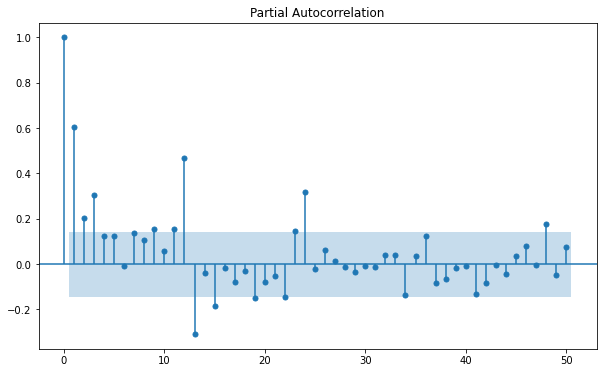

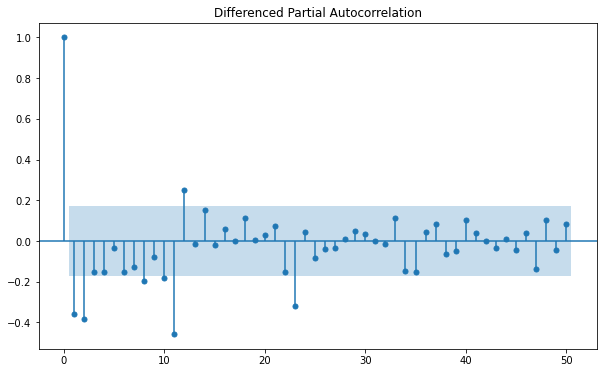

In [91]:
plot_pacf(df['Rose'],lags = 50)
plot_pacf(train.diff().dropna(),lags = 50,title='Differenced Partial Autocorrelation')
plt.show();

# Check for stationarity of the Training Data Time Series.

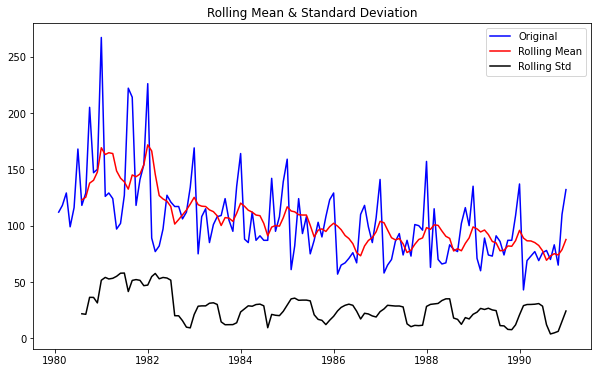

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [92]:
test_stationarity(train['Rose'])

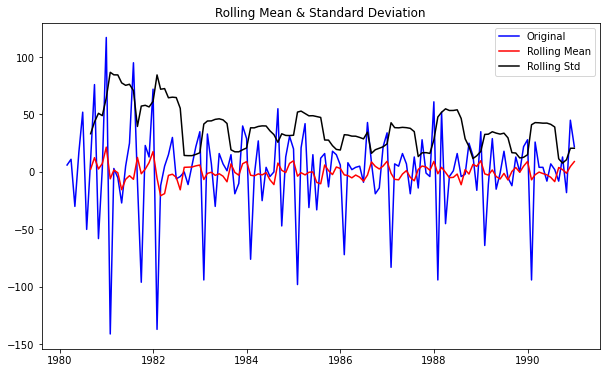

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [93]:
test_stationarity(train['Rose'].diff().dropna())

# Q.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [94]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [95]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [96]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(0, 1, 4) - AIC:1281.676698214394
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223310003
ARIMA(1, 1, 4) - AIC:1279.6052625434186
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284
ARIMA(2, 1, 3) - AIC:1274.6949119626274
ARIMA(2, 1, 4) - AIC:1278.772249045519
ARIMA(3, 1, 0) - AIC:1297.48109172717
ARIMA(3, 1, 1) - AIC:1282.4192776271977
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6588655941036
ARIMA(3, 1, 4) - AIC:1287.7190768443138
ARIMA(4, 1, 0) - AIC:1296.32665690046
ARIMA(4, 1, 1) - AIC:1283.7931715123075
ARIMA(4, 1, 2) - AIC:1285.7182485626197
ARIMA(4, 1, 3) - AIC:1278.4514105832604
ARIMA(4, 1, 4) - AIC:1282.3776177189604


In [97]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
13,"(2, 1, 3)",1274.694912
23,"(4, 1, 3)",1278.451411
18,"(3, 1, 3)",1278.658866
14,"(2, 1, 4)",1278.772249
9,"(1, 1, 4)",1279.605263


In [98]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 25 Sep 2022   AIC                           1274.695
Time:                        19:15:21   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

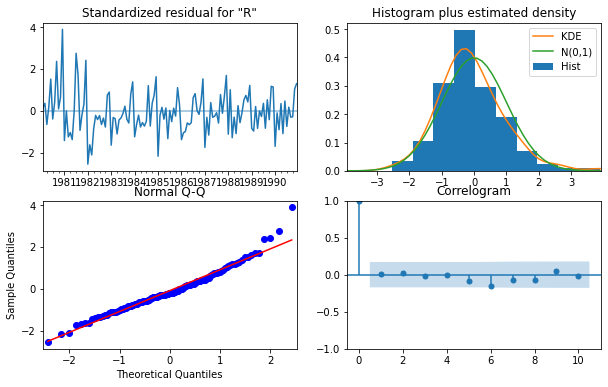

In [99]:
results_auto_ARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [100]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [101]:
test_rmse_arima = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
test_mape_arima = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',test_rmse_arima,'\nMAPE:',test_mape_arima)

RMSE: 36.81742323289034 
MAPE: 75.84837827903644


In [102]:
resultsDf_9 = pd.DataFrame({'Test RMSE':test_rmse_arima,'MAPE':test_mape_arima}
                           ,index=['Arima (2,1,3)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,15.268955,NaN
NaiveModel,79.718773,NaN
SimpleAverageModel,53.460570,NaN
2pointTrailingMovingAverage,11.529278,NaN
4pointTrailingMovingAverage,14.451403,NaN
6pointTrailingMovingAverage,14.566327,NaN
9pointTrailingMovingAverage,14.727630,NaN
"Alpha=0.10,SimpleExponentialSmoothing",36.796241,NaN
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944,NaN
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661,NaN


# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [104]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [105]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [106]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182699
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625241
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149016
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721783
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312437
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515017
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426205107
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820642259
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765140148
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505217112
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917099400444
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AI

In [107]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744297
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582106
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205635
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684951


In [108]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 25 Sep 2022   AIC                            951.744
Time:                                   19:18:38   BIC                            981.349
Sample:                                        0   HQIC                           963.750
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.082      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.919

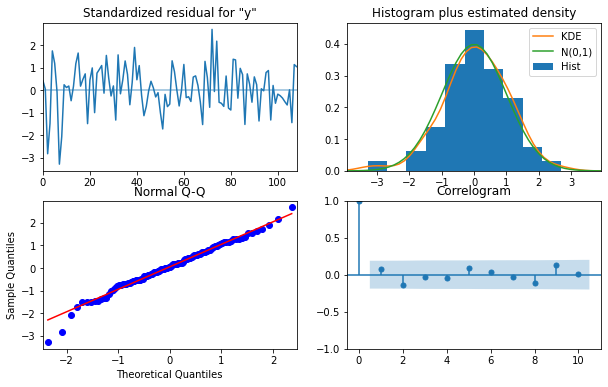

In [109]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [111]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,66.899868,16.350418,34.853637,98.946099
1,65.988383,16.481660,33.684922,98.291843
2,74.437591,16.587582,41.926527,106.948655
3,76.041031,16.710175,43.289690,108.792373
4,78.413894,16.710789,45.661351,111.166438


In [112]:
test_rmse_sarima6 = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
test_mape_sarima6 = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean)
print('RMSE:',test_rmse_sarima6,'\nMAPE:',test_mape_sarima6)

RMSE: 27.12407595995941 
MAPE: 55.238878434557925


In [113]:
resultsDf_12 = pd.DataFrame({'Test RMSE':test_rmse_sarima6,'MAPE':test_mape_sarima6}
                           ,index=['Sarima (1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,15.268955,NaN
NaiveModel,79.718773,NaN
SimpleAverageModel,53.460570,NaN
2pointTrailingMovingAverage,11.529278,NaN
4pointTrailingMovingAverage,14.451403,NaN
6pointTrailingMovingAverage,14.566327,NaN
9pointTrailingMovingAverage,14.727630,NaN
"Alpha=0.10,SimpleExponentialSmoothing",36.796241,NaN
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944,NaN
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661,NaN


# Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [114]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [115]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [116]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638088
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3637.5061581686405
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753799
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3407.446634990324
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945577
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3095.2869350209926
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702637687
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.530413612806
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3794.462143968869
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2

In [117]:
SARIMA_AIC.sort_values(by=['AIC']).head()  

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400285
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880935
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [118]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 25 Sep 2022   AIC                            774.400
Time:                                         19:26:51   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

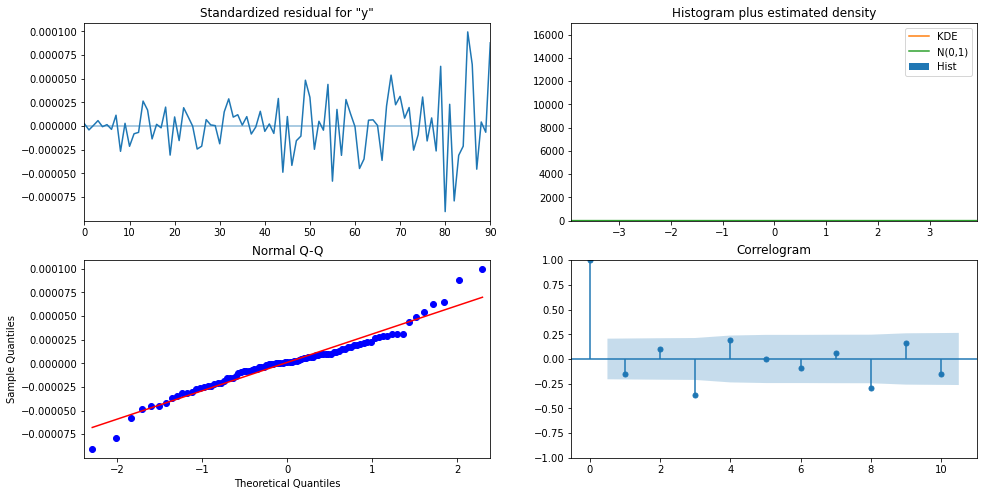

In [119]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [120]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [121]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,55.235183,13.907850,27.976299,82.494068
1991-02-28,68.123102,13.991296,40.700666,95.545538
1991-03-31,67.908695,14.012349,40.444996,95.372394
1991-04-30,66.786183,14.099653,39.151370,94.420996
1991-05-31,69.760050,14.109013,42.106893,97.413206


In [122]:
test_rmse_sarima = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
test_mape_sarima = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',test_rmse_sarima,'\nMAPE:',test_mape_sarima)

RMSE: 18.881945915548297 
MAPE: 36.37549759795202


In [123]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'MAPE':test_mape_sarima}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])
resultsDf_10

,Test RMSE,MAPE
"SARIMA(3,1,1)(3,0,2,12)",18.881946,36.375498


In [124]:
resultsDf = pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,15.268955,NaN
NaiveModel,79.718773,NaN
SimpleAverageModel,53.460570,NaN
2pointTrailingMovingAverage,11.529278,NaN
4pointTrailingMovingAverage,14.451403,NaN
6pointTrailingMovingAverage,14.566327,NaN
9pointTrailingMovingAverage,14.727630,NaN
"Alpha=0.10,SimpleExponentialSmoothing",36.796241,NaN
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944,NaN
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661,NaN


# Q.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

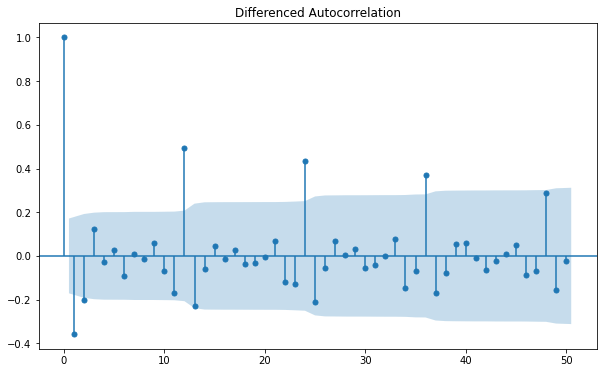

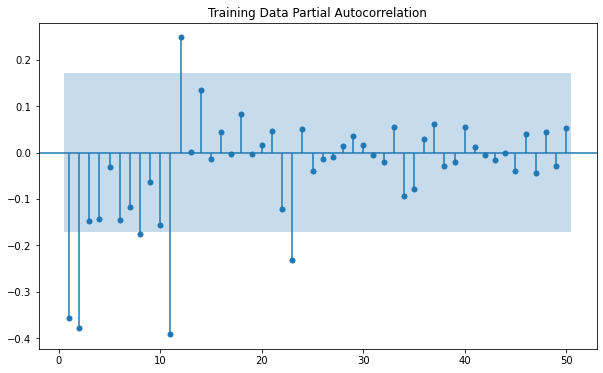

In [125]:
plot_acf(train.diff().dropna(),lags = 50,title='Differenced Autocorrelation')
plot_pacf(train.diff().dropna(),lags = 50,title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show();

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p and q parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period). By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model.

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

# ARIMA

In [126]:
auto_ARIMA_new = ARIMA(train, order=(2,0,2))

results_auto_ARIMAAA = auto_ARIMA_new.fit()

print(results_auto_ARIMAAA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -640.124
Date:                Sun, 25 Sep 2022   AIC                           1292.248
Time:                        19:26:54   BIC                           1309.545
Sample:                    01-31-1980   HQIC                          1299.277
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.7361     24.545      4.389      0.000      59.628     155.844
ar.L1          0.5278      0.293      1.804      0.071      -0.046       1.101
ar.L2          0.4511      0.278      1.624      0.1

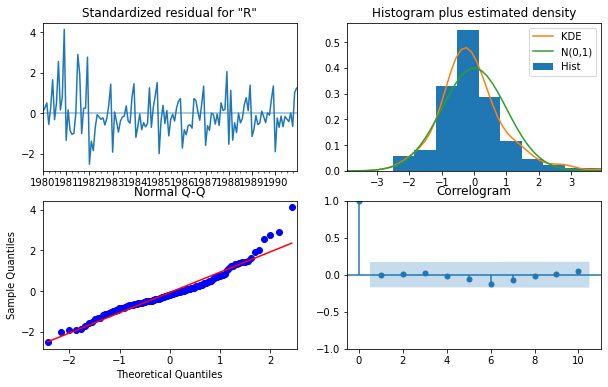

In [127]:
results_auto_ARIMAAA.plot_diagnostics();

In [128]:
predicted_auto_ARIMAAA = results_auto_ARIMAAA.forecast(steps=len(test))

In [129]:
test_rmse_arima = mean_squared_error(test['Rose'],predicted_auto_ARIMAAA,squared=False)
test_mape_arima = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMAAA)
print('RMSE:',test_rmse_arima,'\nMAPE:',test_mape_arima)

RMSE: 45.224558150529994 
MAPE: 93.34975740940934


In [130]:
resultsDf_13 = pd.DataFrame({'Test RMSE':test_rmse_arima,'MAPE':test_mape_arima}
                           ,index=['Arima (2,0,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,15.268955,NaN
NaiveModel,79.718773,NaN
SimpleAverageModel,53.460570,NaN
2pointTrailingMovingAverage,11.529278,NaN
4pointTrailingMovingAverage,14.451403,NaN
6pointTrailingMovingAverage,14.566327,NaN
9pointTrailingMovingAverage,14.727630,NaN
"Alpha=0.10,SimpleExponentialSmoothing",36.796241,NaN
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944,NaN
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661,NaN


# SARIMA

In [131]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 0, 2),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -386.084
Date:                            Sun, 25 Sep 2022   AIC                            792.168
Time:                                    19:27:01   BIC                            817.601
Sample:                                         0   HQIC                           802.441
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0161      0.636     -1.597      0.110      -2.263       0.231
ar.L2         -0.1892      0.580   

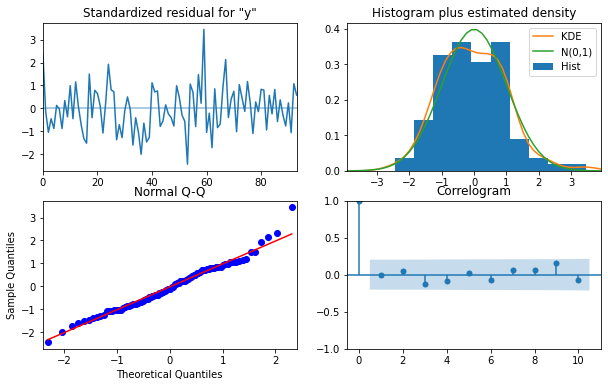

In [132]:
results_SARIMA_new.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [133]:
predicted_manual_SARIMA = results_SARIMA_new.get_forecast(steps=len(test))

In [134]:
test_rmse_sarima_new = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
test_mape_sarima_new = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',test_rmse_sarima_new,'\nMAPE:',test_mape_sarima_new)

RMSE: 16.947204698440167 
MAPE: 31.29841985287618


In [135]:
resultsDf_11 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(2, 0, 2)(3, 0, 2, 12)'])
resultsDf_11

,Test RMSE,MAPE
"SARIMA(2, 0, 2)(3, 0, 2, 12)",16.947205,31.29842


In [136]:
resultsDf = pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE,MAPE
RegressionOnTime,15.268955,NaN
NaiveModel,79.718773,NaN
SimpleAverageModel,53.460570,NaN
2pointTrailingMovingAverage,11.529278,NaN
4pointTrailingMovingAverage,14.451403,NaN
6pointTrailingMovingAverage,14.566327,NaN
9pointTrailingMovingAverage,14.727630,NaN
"Alpha=0.10,SimpleExponentialSmoothing",36.796241,NaN
"Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing",15.268944,NaN
"Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing",14.249661,NaN


# Q.8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [137]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['MAPE']))

Sorted by RMSE values on the Test Data: 
                                                     Test RMSE       MAPE
2pointTrailingMovingAverage                         11.529278        NaN
Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponen...  14.249661        NaN
4pointTrailingMovingAverage                         14.451403        NaN
6pointTrailingMovingAverage                         14.566327        NaN
9pointTrailingMovingAverage                         14.727630        NaN
Alpha=1.49,Beta=1.66:DoubleExponentialSmoothing     15.268944        NaN
RegressionOnTime                                    15.268955        NaN
SARIMA(2, 0, 2)(3, 0, 2, 12)                        16.947205  31.298420
SARIMA(3,1,1)(3,0,2,12)                             18.881946  36.375498
Alpha=0.07,Beta=0.05,Gamma=7.24:Triple Exponent...  20.156763        NaN
Sarima (1,1,2)(2,0,2,6)                             27.124076  55.238878
Alpha=0.10,SimpleExponentialSmoothing               36.796241        NaN
Arima (2,

Although we are seeing that the best model as per RMSE is the 2pointTrailingMovingAverage as it is giving us the least RMSE value. But the moving average models are actually quite a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. Hence we will going to choose the second best model which comes out to be Triple Exponential Model. Its RMSE value is very close to the 2pointTrailingMovingAverage value hence we can choose this model as well.

# Q.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

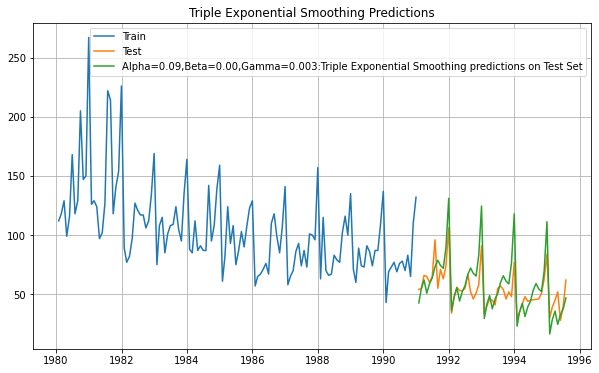

In [138]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.09,Beta=0.00,Gamma=0.003:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [139]:
fullmodel1 = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.09,smoothing_slope=0.00,smoothing_seasonal=0.003)

In [140]:
rmse = mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 17.68567622997536


In [141]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)

In [142]:
prediction_1

1995-08-31    49.598298
1995-09-30    46.440145
1995-10-31    45.178368
1995-11-30    59.780864
1995-12-31    98.069768
1996-01-31    13.600846
1996-02-29    23.900520
1996-03-31    31.450408
1996-04-30    24.243478
1996-05-31    27.593761
1996-06-30    33.089608
1996-07-31    43.695300
Freq: M, dtype: float64

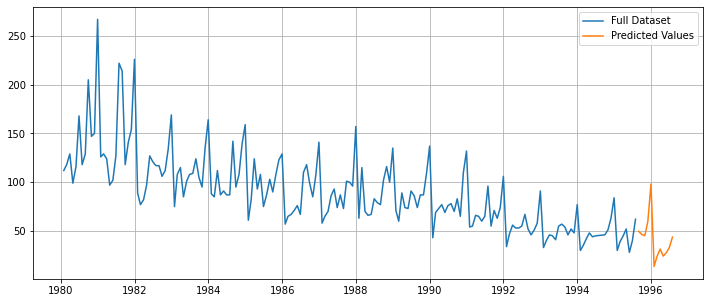

In [143]:
plt.figure(figsize=(12,5))
plt.plot(df['Rose'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [144]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,33.165042,49.598298,137.138617
1995-09-30,30.006889,46.440145,133.980465
1995-10-31,28.745112,45.178368,132.718688
1995-11-30,43.347608,59.780864,147.321184
1995-12-31,81.636512,98.069768,185.610087


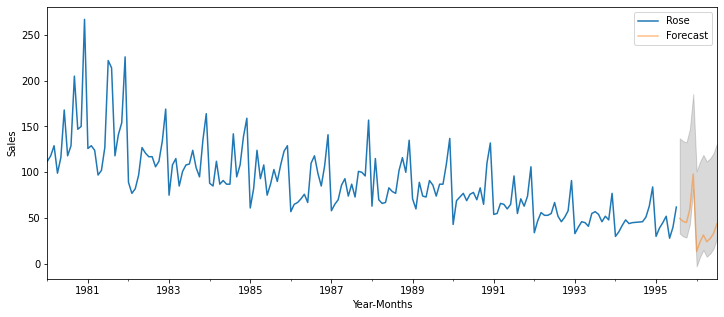

In [145]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(12,5))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

# Q.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

We can see here that the sales are going down as we have to do something about it because it shouldn't be continue like that here are my some suggetion to solve the problems.

1.If the wine is not tasty enough for the consumer we should perform some test and make the taste better so that the sales can increase as more number of consumer will start consuming it.

2.We can also supply or can say do partnership with hotels so that they start giving these wines at their hotel so the reviews can increse also it will be advertised and also will be consumed more and hence the people will start to like it and the sales can increase.

3.we should establish schemes and discount and different types of offers so that we can attract the customers ans then they buy the wine.

4.we can see that in the last months the sales of the wine is high so we need to address other months as well and find out what the problem is. is it the taste of the wine, the quality of the wine or the price of the wine which can be playing a role in the sales of the wine.